## Task about lake depth

In [230]:
import numpy as np
import matplotlib.pyplot as plt


In [255]:
np.random.seed(2023)
ar = np.random.randint(1, 100, 20)

In [262]:
def get_lake_depth(a):
    # get np.array and return most depth lake with left and right side
    min_index = np.argmin(a)
    left_side = np.argmax(a[:min_index])
    right_side = np.argmax(a[min_index:]) + min_index
    return left_side, right_side
    
def plot_lake(a, left, right):
    # additional information
    water_point = min(a[left], a[right])
    
    plt.plot(a)
    plt.plot(np.arange(left, right+1), a[left:right+1], c='r')
    plt.show()

In [263]:
left, right = get_lake_depth()
left, right

(5, 9)

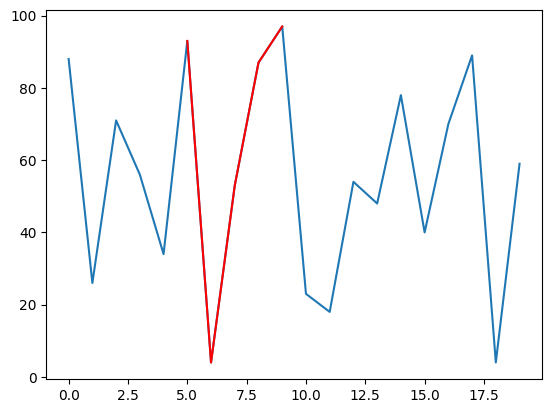

In [264]:
plot_lake(ar, left, right)

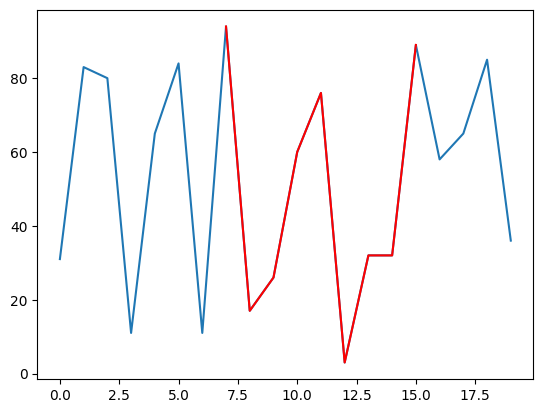

In [240]:
np.random.seed(187)
ar = np.random.randint(1, 100, 20)
left, right = get_lake_depth(ar)
plot_lake(ar, left, right)

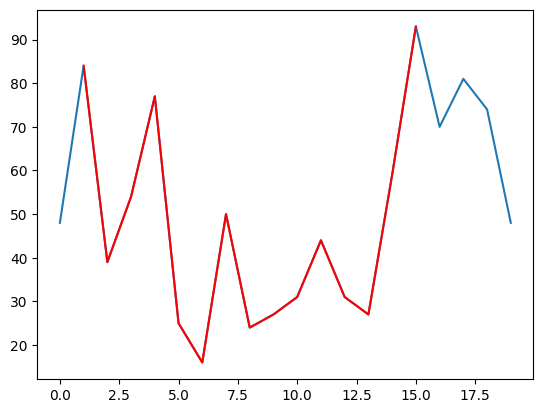

In [242]:
np.random.seed(1234)
ar = np.random.randint(1, 100, 20)
left, right = get_lake_depth(ar)
plot_lake(ar, left, right)

## Task about sum and product

```
There are two whole numbers:
1 < a,b <100

One scientist("Sum") get provided with sum of numbers,
another  ("Prod") get provided with product of numbers. 
Both scientists know that numbers 1 < a,b <100.

Determine the numbers being based on the following dialog: 
    Prod: I don't know the numbers;
    Sum: I know it;
    Prod: then I know the numbers; 
    Sum: then I know the numbers too.
```

In [235]:
import pandas as pd

In [236]:
numbers = [[[i, j]] for i in range(2, 100)
           for j in range(i+1, 100)]


In [237]:
numbers = pd.DataFrame(numbers, columns=['nums'])
numbers.head()

,nums
0,"[2, 3]"
1,"[2, 4]"
2,"[2, 5]"
3,"[2, 6]"
4,"[2, 7]"


In [238]:
numbers['s'] = numbers.nums.apply(lambda x: x[0] + x[1])
numbers['p'] = numbers.nums.apply(lambda x: x[0] * x[1])
numbers.head()

,nums,s,p
0,"[2, 3]",5,6
1,"[2, 4]",6,8
2,"[2, 5]",7,10
3,"[2, 6]",8,12
4,"[2, 7]",9,14


In [239]:
numbers['s_pairs'] = numbers.s.apply(lambda x: list(numbers[numbers.s == x].nums.values))
numbers['p_pairs'] = numbers.p.apply(lambda x: list(numbers[numbers.p == x].nums.values))
numbers

,nums,s,p,s_pairs,p_pairs
0,"[2, 3]",5,6,"[[2, 3]]","[[2, 3]]"
1,"[2, 4]",6,8,"[[2, 4]]","[[2, 4]]"
2,"[2, 5]",7,10,"[[2, 5], [3, 4]]","[[2, 5]]"
3,"[2, 6]",8,12,"[[2, 6], [3, 5]]","[[2, 6], [3, 4]]"
4,"[2, 7]",9,14,"[[2, 7], [3, 6], [4, 5]]","[[2, 7]]"
...,...,...,...,...,...
4748,"[96, 98]",194,9408,"[[95, 99], [96, 98]]","[[96, 98]]"
4749,"[96, 99]",195,9504,"[[96, 99], [97, 98]]","[[96, 99]]"
4750,"[97, 98]",195,9506,"[[96, 99], [97, 98]]","[[97, 98]]"
4751,"[97, 99]",196,9603,"[[97, 99]]","[[97, 99]]"


## Step 1: Remove combinations that have unique product

In [212]:
# pairs with unique prods
unique_prod_pairs = numbers.loc[numbers.p_pairs.apply(len) == 1, 'p_pairs'].values
unique_prod_pairs = list(x[0] for x in unique_prod_pairs)
# remove pairs where product have only one pair
numbers_s1 = numbers[numbers.p_pairs.apply(len) != 1]
numbers_s1

,nums,s,p,s_pairs,p_pairs
3,"[2, 6]",8,12,"[[2, 6], [3, 5]]","[[2, 6], [3, 4]]"
6,"[2, 9]",11,18,"[[2, 9], [3, 8], [4, 7], [5, 6]]","[[2, 9], [3, 6]]"
7,"[2, 10]",12,20,"[[2, 10], [3, 9], [4, 8], [5, 7]]","[[2, 10], [4, 5]]"
9,"[2, 12]",14,24,"[[2, 12], [3, 11], [4, 10], [5, 9], [6, 8]]","[[2, 12], [3, 8], [4, 6]]"
11,"[2, 14]",16,28,"[[2, 14], [3, 13], [4, 12], [5, 11], [6, 10], ...","[[2, 14], [4, 7]]"
...,...,...,...,...,...
4581,"[80, 99]",179,7920,"[[80, 99], [81, 98], [82, 97], [83, 96], [84, ...","[[80, 99], [88, 90]]"
4588,"[81, 88]",169,7128,"[[70, 99], [71, 98], [72, 97], [73, 96], [74, ...","[[72, 99], [81, 88]]"
4636,"[84, 88]",172,7392,"[[73, 99], [74, 98], [75, 97], [76, 96], [77, ...","[[77, 96], [84, 88]]"
4639,"[84, 91]",175,7644,"[[76, 99], [77, 98], [78, 97], [79, 96], [80, ...","[[78, 98], [84, 91]]"


### After first filter we have 3021 possibilities

## Step two is remove combinations that have unique_prod_pairs in their sum combinations 

In [213]:
# all unique pairs
len(unique_prod_pairs)

1732

In [214]:
# remove pairs where unique_pairs_prod not in s_pairs
numbers_s2 = numbers_s1[numbers_s1.s_pairs.apply(lambda x: all([uniq not in x for uniq in unique_prod_pairs]))]
numbers_s2

,nums,s,p,s_pairs,p_pairs
6,"[2, 9]",11,18,"[[2, 9], [3, 8], [4, 7], [5, 6]]","[[2, 9], [3, 6]]"
12,"[2, 15]",17,30,"[[2, 15], [3, 14], [4, 13], [5, 12], [6, 11], ...","[[2, 15], [3, 10], [5, 6]]"
18,"[2, 21]",23,42,"[[2, 21], [3, 20], [4, 19], [5, 18], [6, 17], ...","[[2, 21], [3, 14], [6, 7]]"
22,"[2, 25]",27,50,"[[2, 25], [3, 24], [4, 23], [5, 22], [6, 21], ...","[[2, 25], [5, 10]]"
24,"[2, 27]",29,54,"[[2, 27], [3, 26], [4, 25], [5, 24], [6, 23], ...","[[2, 27], [3, 18], [6, 9]]"
...,...,...,...,...,...
1827,"[23, 24]",47,552,"[[2, 45], [3, 44], [4, 43], [5, 42], [6, 41], ...","[[6, 92], [8, 69], [12, 46], [23, 24]]"
1833,"[23, 30]",53,690,"[[2, 51], [3, 50], [4, 49], [5, 48], [6, 47], ...","[[10, 69], [15, 46], [23, 30]]"
1907,"[24, 29]",53,696,"[[2, 51], [3, 50], [4, 49], [5, 48], [6, 47], ...","[[8, 87], [12, 58], [24, 29]]"
1980,"[25, 28]",53,700,"[[2, 51], [3, 50], [4, 49], [5, 48], [6, 47], ...","[[10, 70], [14, 50], [20, 35], [25, 28]]"


### After second step we have 145 possibilities

## Step 3: remove pairs that have similliar product (where p.value_counts() == 1) 

In [216]:
product_1_time = list(numbers_s2.p.value_counts()[numbers_s2.p.value_counts() == 1].index)
len(product_1_time)

86

In [217]:
numbers_s3 = numbers_s2[(numbers_s2.p.apply(lambda x: x in product_1_time))]
numbers_s3

,nums,s,p,s_pairs,p_pairs
6,"[2, 9]",11,18,"[[2, 9], [3, 8], [4, 7], [5, 6]]","[[2, 9], [3, 6]]"
22,"[2, 25]",27,50,"[[2, 25], [3, 24], [4, 23], [5, 22], [6, 21], ...","[[2, 25], [5, 10]]"
24,"[2, 27]",29,54,"[[2, 27], [3, 26], [4, 25], [5, 24], [6, 23], ...","[[2, 27], [3, 18], [6, 9]]"
101,"[3, 8]",11,24,"[[2, 9], [3, 8], [4, 7], [5, 6]]","[[2, 12], [3, 8], [4, 6]]"
125,"[3, 32]",35,96,"[[2, 33], [3, 32], [4, 31], [5, 30], [6, 29], ...","[[2, 48], [3, 32], [4, 24], [6, 16], [8, 12]]"
...,...,...,...,...,...
1827,"[23, 24]",47,552,"[[2, 45], [3, 44], [4, 43], [5, 42], [6, 41], ...","[[6, 92], [8, 69], [12, 46], [23, 24]]"
1833,"[23, 30]",53,690,"[[2, 51], [3, 50], [4, 49], [5, 48], [6, 47], ...","[[10, 69], [15, 46], [23, 30]]"
1907,"[24, 29]",53,696,"[[2, 51], [3, 50], [4, 49], [5, 48], [6, 47], ...","[[8, 87], [12, 58], [24, 29]]"
1980,"[25, 28]",53,700,"[[2, 51], [3, 50], [4, 49], [5, 48], [6, 47], ...","[[10, 70], [14, 50], [20, 35], [25, 28]]"


### We have 86 combinations left

## And final step: remove pairs that have simmilar sum (where s.value_counts() == 1)

In [218]:
sum_1_time = list(numbers_s3.s.value_counts()[numbers_s3.s.value_counts() == 1].index)
len(sum_1_time)

1

In [219]:
final = numbers_s3[(numbers_s3.s.apply(lambda x: x in sum_1_time))]
results = list(final.nums.values)


In [220]:
f"Final pairs is: {results}"

'Final pairs is: [[4, 13]]'

# And the only solution is pair of (4, 13) with P: 52 and S: 17